# 1. Import Libraries

In [6]:
!pip3 install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 6.9 MB/s eta 0:00:00


In [25]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 69.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
feature-engine 1.8.2 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [1]:
import numpy as np

import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
	OneHotEncoder,
	OrdinalEncoder,
	StandardScaler,
	MinMaxScaler,
	PowerTransformer,
	FunctionTransformer
)

from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.encoding import (
	RareLabelEncoder,
	MeanEncoder,
	CountFrequencyEncoder
)

import matplotlib.pyplot as plt

import warnings


# 2. Display Settings

In [2]:
pd.set_option("display.max_columns", None)
sklearn.set_config(transform_output = "pandas") # display df for transformer
warnings.filterwarnings("ignore")

# 3. Read the Train dataset

In [3]:
path = r"/content/train.csv"
train = pd.read_csv(path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Banglore,Delhi,11:10:00,14:05:00,175,0.0,In-flight meal not included,5769
1,Indigo,2019-03-27,Chennai,Kolkata,14:40:00,17:05:00,145,0.0,No Info,3384
2,Indigo,2019-03-27,Delhi,Cochin,06:40:00,22:20:00,940,1.0,No Info,6442
3,Jet Airways,2019-05-18,Kolkata,Banglore,09:35:00,14:25:00,1730,1.0,No Info,13067
4,Multiple Carriers,2019-06-12,Delhi,Cochin,08:00:00,19:15:00,675,1.0,No Info,15058
...,...,...,...,...,...,...,...,...,...,...
413,Air Asia,2019-04-12,Kolkata,Banglore,22:50:00,01:20:00,150,0.0,No Info,4409
414,Spicejet,2019-03-03,Kolkata,Banglore,17:15:00,19:45:00,150,0.0,No Info,6251
415,Jet Airways,2019-05-18,Kolkata,Banglore,14:05:00,16:20:00,1575,1.0,In-flight meal not included,10844
416,Jet Airways,2019-04-01,Kolkata,Banglore,18:55:00,23:35:00,1720,1.0,In-flight meal not included,7064


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          418 non-null    object 
 1   date_of_journey  418 non-null    object 
 2   source           418 non-null    object 
 3   destination      418 non-null    object 
 4   dep_time         418 non-null    object 
 5   arrival_time     418 non-null    object 
 6   duration         418 non-null    int64  
 7   total_stops      418 non-null    float64
 8   additional_info  418 non-null    object 
 9   price            418 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 32.8+ KB


In [5]:
X_train = train.drop(columns="price")
y_train = train.price.copy()

In [6]:
X_train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Jet Airways,2019-06-21,Banglore,Delhi,11:10:00,14:05:00,175,0.0,In-flight meal not included
1,Indigo,2019-03-27,Chennai,Kolkata,14:40:00,17:05:00,145,0.0,No Info
2,Indigo,2019-03-27,Delhi,Cochin,06:40:00,22:20:00,940,1.0,No Info
3,Jet Airways,2019-05-18,Kolkata,Banglore,09:35:00,14:25:00,1730,1.0,No Info
4,Multiple Carriers,2019-06-12,Delhi,Cochin,08:00:00,19:15:00,675,1.0,No Info
...,...,...,...,...,...,...,...,...,...
413,Air Asia,2019-04-12,Kolkata,Banglore,22:50:00,01:20:00,150,0.0,No Info
414,Spicejet,2019-03-03,Kolkata,Banglore,17:15:00,19:45:00,150,0.0,No Info
415,Jet Airways,2019-05-18,Kolkata,Banglore,14:05:00,16:20:00,1575,1.0,In-flight meal not included
416,Jet Airways,2019-04-01,Kolkata,Banglore,18:55:00,23:35:00,1720,1.0,In-flight meal not included


In [7]:
y_train

,price
0,5769
1,3384
2,6442
3,13067
4,15058
...,...
413,4409
414,6251
415,10844
416,7064


# 4. Transformation Operations

In [8]:
X_train.columns.to_list()

['airline',
 'date_of_journey',
 'source',
 'destination',
 'dep_time',
 'arrival_time',
 'duration',
 'total_stops',
 'additional_info']

## 4.1 Airline

In [9]:
X_train.airline

,airline
0,Jet Airways
1,Indigo
2,Indigo
3,Jet Airways
4,Multiple Carriers
...,...
413,Air Asia
414,Spicejet
415,Jet Airways
416,Jet Airways


In [10]:
air_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2, variables=["airline"])),
	("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

air_transformer.fit_transform(X_train.loc[:, ["airline"]])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
413,0.0,0.0,0.0,0.0,1.0
414,0.0,0.0,0.0,0.0,1.0
415,0.0,0.0,1.0,0.0,0.0
416,0.0,0.0,1.0,0.0,0.0


## 4.2 date_of_journey

In [11]:
X_train.date_of_journey

,date_of_journey
0,2019-06-21
1,2019-03-27
2,2019-03-27
3,2019-05-18
4,2019-06-12
...,...
413,2019-04-12
414,2019-03-03
415,2019-05-18
416,2019-04-01


In [12]:
feature_to_extract = ["month", "week", "day_of_week", "day_of_year"]

doj_transformer = Pipeline(steps=[
    ("dt", DatetimeFeatures(features_to_extract=feature_to_extract, yearfirst=True, format="mixed")),
    ("scaler", MinMaxScaler())
])

doj_transformer.fit_transform(X_train.loc[:, ["date_of_journey"]])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,1.000000,0.941176,0.666667,0.949153
1,0.000000,0.235294,0.333333,0.220339
2,0.000000,0.235294,0.333333,0.220339
3,0.666667,0.647059,0.833333,0.661017
4,1.000000,0.882353,0.333333,0.872881
...,...,...,...,...
413,0.333333,0.352941,0.666667,0.355932
414,0.000000,0.000000,1.000000,0.016949
415,0.666667,0.647059,0.833333,0.661017
416,0.333333,0.294118,0.000000,0.262712


## 4.3 source and destination

In [13]:
X_train.source

,source
0,Banglore
1,Chennai
2,Delhi
3,Kolkata
4,Delhi
...,...
413,Kolkata
414,Kolkata
415,Kolkata
416,Kolkata


In [14]:
X_train.destination

,destination
0,Delhi
1,Kolkata
2,Cochin
3,Banglore
4,Cochin
...,...
413,Banglore
414,Banglore
415,Banglore
416,Banglore


In [15]:
location_subset = X_train.loc[:, ["source", "destination"]]
location_subset

,source,destination
0,Banglore,Delhi
1,Chennai,Kolkata
2,Delhi,Cochin
3,Kolkata,Banglore
4,Delhi,Cochin
...,...,...
413,Kolkata,Banglore
414,Kolkata,Banglore
415,Kolkata,Banglore
416,Kolkata,Banglore


In [16]:
location_pipe1 = Pipeline(steps=[
    ("grouper", RareLabelEncoder(tol = 0.1, replace_with="Other", n_categories=2)),
    ("encode", MeanEncoder()),
    ("power_trans", PowerTransformer())
])

location_pipe1.fit_transform(location_subset, y_train)

,source,destination
0,-0.797468,-2.054612
1,-1.904297,-0.731179
2,1.062069,1.058965
3,-0.166324,-0.208167
4,1.062069,1.058965
...,...,...
413,-0.166324,-0.208167
414,-0.166324,-0.208167
415,-0.166324,-0.208167
416,-0.166324,-0.208167


In [17]:
np.union1d(
	X_train.source.unique(),
	X_train.destination.unique()
)

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai', 'New Delhi'], dtype=object)

In [18]:
def is_north(X):
  columns = X.columns.to_list()
  north_cities = ["Delhi", "Mumbai", "New Delhi"]
  return(
      X
      .assign(**{
          f"{col}_is_north" : X.loc[:,col].isin(north_cities).astype(int)
          for col in columns
      })
      .drop(columns = columns)
  )
FunctionTransformer(func=is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,0,1
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
413,0,0
414,0,0
415,0,0
416,0,0


In [19]:
location_transformer = FeatureUnion(transformer_list=[
    ("Part1", location_pipe1),
    ("Part2", FunctionTransformer(func=is_north))
])

location_transformer.fit_transform(location_subset, y_train)

,source,destination,source_is_north,destination_is_north
0,-0.797468,-2.054612,0,1
1,-1.904297,-0.731179,0,0
2,1.062069,1.058965,1,0
3,-0.166324,-0.208167,0,0
4,1.062069,1.058965,1,0
...,...,...,...,...
413,-0.166324,-0.208167,0,0
414,-0.166324,-0.208167,0,0
415,-0.166324,-0.208167,0,0
416,-0.166324,-0.208167,0,0


## 4.4 dep_time & arrival_time

In [20]:
X_train.dep_time

,dep_time
0,11:10:00
1,14:40:00
2,06:40:00
3,09:35:00
4,08:00:00
...,...
413,22:50:00
414,17:15:00
415,14:05:00
416,18:55:00


In [21]:
X_train.arrival_time

,arrival_time
0,14:05:00
1,17:05:00
2,22:20:00
3,14:25:00
4,19:15:00
...,...
413,01:20:00
414,19:45:00
415,16:20:00
416,23:35:00


In [22]:
time_subset = X_train.loc[:, ["dep_time", "arrival_time"]]
time_subset

,dep_time,arrival_time
0,11:10:00,14:05:00
1,14:40:00,17:05:00
2,06:40:00,22:20:00
3,09:35:00,14:25:00
4,08:00:00,19:15:00
...,...,...
413,22:50:00,01:20:00
414,17:15:00,19:45:00
415,14:05:00,16:20:00
416,18:55:00,23:35:00


In [23]:
time_pipe1 = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=["hour", "minute"])),
	("scaler", MinMaxScaler())
])

time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.428571,0.181818,0.608696,0.090909
1,0.571429,0.727273,0.739130,0.090909
2,0.190476,0.727273,0.956522,0.363636
3,0.333333,0.636364,0.608696,0.454545
4,0.285714,0.000000,0.826087,0.272727
...,...,...,...,...
413,0.952381,0.909091,0.043478,0.363636
414,0.714286,0.272727,0.826087,0.818182
415,0.571429,0.090909,0.695652,0.363636
416,0.761905,1.000000,1.000000,0.636364


In [24]:
def part_of_day(X, morning=4, noon=12, eve=16, night=20):
	columns = X.columns.to_list()
	X_temp = X.assign(**{
		col: pd.to_datetime(X.loc[:, col]).dt.hour
		for col in columns
	})

	return (
		X_temp
		.assign(**{
			f"{col}_part_of_day": np.select(
				[X_temp.loc[:, col].between(morning, noon, inclusive="left"),
				 X_temp.loc[:, col].between(noon, eve, inclusive="left"),
				 X_temp.loc[:, col].between(eve, night, inclusive="left")],
				["morning", "afternoon", "evening"],
				default="night"
			)
			for col in columns
		})
		.drop(columns=columns)
	)

FunctionTransformer(func=part_of_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,morning,afternoon
1,afternoon,evening
2,morning,night
3,morning,afternoon
4,morning,evening
...,...,...
413,night,night
414,evening,evening
415,afternoon,evening
416,evening,night


In [25]:
time_pipe2 = Pipeline(steps=[
	("part", FunctionTransformer(func=part_of_day)),
	("encoder", CountFrequencyEncoder()),
	("scaler", MinMaxScaler())
])

time_pipe2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,1.000000,0.000000
1,0.000000,0.842105
2,1.000000,0.719298
3,1.000000,0.000000
4,1.000000,0.842105
...,...,...
413,0.136364,0.719298
414,0.212121,0.842105
415,0.000000,0.842105
416,0.212121,0.719298


In [26]:
time_transformer = FeatureUnion(transformer_list=[
	("part1", time_pipe1),
	("part2", time_pipe2)
])

time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.428571,0.181818,0.608696,0.090909,1.000000,0.000000
1,0.571429,0.727273,0.739130,0.090909,0.000000,0.842105
2,0.190476,0.727273,0.956522,0.363636,1.000000,0.719298
3,0.333333,0.636364,0.608696,0.454545,1.000000,0.000000
4,0.285714,0.000000,0.826087,0.272727,1.000000,0.842105
...,...,...,...,...,...,...
413,0.952381,0.909091,0.043478,0.363636,0.136364,0.719298
414,0.714286,0.272727,0.826087,0.818182,0.212121,0.842105
415,0.571429,0.090909,0.695652,0.363636,0.000000,0.842105
416,0.761905,1.000000,1.000000,0.636364,0.212121,0.719298


## 4.5 Duration

In [27]:
X_train.duration

,duration
0,175
1,145
2,940
3,1730
4,675
...,...
413,150
414,150
415,1575
416,1720


In [28]:
(
	X_train
	.duration
	.quantile([0.25, 0.5, 0.75])
	.values
	.reshape(-1, 1)
	# .shape
)

array([[170.  ],
       [510.  ],
       [938.75]])

In [29]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
	def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
		self.variables = variables
		self.percentiles = percentiles
		self.gamma = gamma


	def fit(self, X, y=None):
		if not self.variables:
			self.variables = X.select_dtypes(include="number").columns.to_list()

		self.reference_values_ = {
			col: (
				X
				.loc[:, col]
				.quantile(self.percentiles)
				.values
				.reshape(-1, 1)
			)
			for col in self.variables
		}

		return self


	def transform(self, X):
		objects = []
		for col in self.variables:
			columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
			obj = pd.DataFrame(
				data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
				columns=columns
			)
			objects.append(obj)
		return pd.concat(objects, axis=1)

In [30]:
RBFPercentileSimilarity(percentiles=[0.4, 0.8]).fit_transform(X_train)

,duration_rbf_40,duration_rbf_80,total_stops_rbf_40,total_stops_rbf_80
0,0.0,0.0,0.904837,0.904837
1,0.0,0.0,0.904837,0.904837
2,0.0,0.0,1.000000,1.000000
3,0.0,0.0,1.000000,1.000000
4,0.0,0.0,1.000000,1.000000
...,...,...,...,...
413,0.0,0.0,0.904837,0.904837
414,0.0,0.0,0.904837,0.904837
415,0.0,0.0,1.000000,1.000000
416,0.0,0.0,1.000000,1.000000


In [31]:
def duration_category(X, short=180, med=400):
	return (
		X
		.assign(duration_cat=np.select([X.duration.lt(short),
									    X.duration.between(short, med, inclusive="left")],
									   ["short", "medium"],
									   default="long"))
		.drop(columns="duration")
	)

In [32]:
def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X.duration.ge(value).astype(int)
		})
		.drop(columns="duration")
	)

In [33]:
duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

duration_transformer.fit_transform(X_train.loc[:, ["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,2.874438,-0.110545,-0.093394,0.0,0,-0.946214
1,-0.333911,-0.110545,-0.093394,0.0,0,-1.005973
2,-0.333911,-0.110545,13.888442,2.0,0,0.577636
3,-0.333911,-0.110545,-0.093394,2.0,1,2.151285
4,-0.333911,-0.110545,-0.093394,2.0,0,0.049766
...,...,...,...,...,...,...
413,-0.333911,-0.110545,-0.093394,0.0,0,-0.996013
414,-0.333911,-0.110545,-0.093394,0.0,0,-0.996013
415,-0.333911,-0.110545,-0.093394,2.0,1,1.842531
416,-0.333911,-0.110545,-0.093394,2.0,1,2.131365


## 4.6 total_stops

In [35]:
X_train.total_stops

,total_stops
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
413,0.0
414,0.0
415,1.0
416,1.0


In [36]:
def is_direct(X):
	return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))


total_stops_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("", FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,0.0,1
1,0.0,1
2,1.0,0
3,1.0,0
4,1.0,0
...,...,...
413,0.0,1
414,0.0,1
415,1.0,0
416,1.0,0


## 4.7 additional_info

In [37]:
X_train.additional_info

,additional_info
0,In-flight meal not included
1,No Info
2,No Info
3,No Info
4,No Info
...,...
413,No Info
414,No Info
415,In-flight meal not included
416,In-flight meal not included


In [38]:
info_pipe1 = Pipeline(steps=[
	("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
	("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ["additional_info"]])


,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
413,0.0,1.0,0.0
414,0.0,1.0,0.0
415,1.0,0.0,0.0
416,1.0,0.0,0.0


In [39]:
def have_info(X):
	return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))

In [40]:
info_union = FeatureUnion(transformer_list=[
	("part1", info_pipe1),
	("part2", FunctionTransformer(func=have_info))
])

In [41]:
info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_transformer.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other,additional_info
0,1.0,0.0,0.0,1
1,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0
4,0.0,1.0,0.0,0
...,...,...,...,...
413,0.0,1.0,0.0,0
414,0.0,1.0,0.0,0
415,1.0,0.0,0.0,1
416,1.0,0.0,0.0,1


# 5. Column Transformer

In [42]:
column_transformer = ColumnTransformer(transformers=[
	("air", air_transformer, ["airline"]),
	("doj", doj_transformer, ["date_of_journey"]),
	("location", location_transformer, ["source", 'destination']),
	("time", time_transformer, ["dep_time", "arrival_time"]),
	("dur", duration_transformer, ["duration"]),
	("stops", total_stops_transformer, ["total_stops"]),
	("info", info_transformer, ["additional_info"])
], remainder="passthrough")

column_transformer.fit_transform(X_train, y_train)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_rbf_75,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info
0,0.0,0.0,1.0,0.0,0.0,1.000000,0.941176,0.666667,0.949153,-0.797468,-2.054612,0,1,0.428571,0.181818,0.608696,0.090909,1.000000,0.000000,2.874438,-0.110545,-0.093394,0.0,0,-0.946214,0.0,1,1.0,0.0,0.0,1
1,0.0,1.0,0.0,0.0,0.0,0.000000,0.235294,0.333333,0.220339,-1.904297,-0.731179,0,0,0.571429,0.727273,0.739130,0.090909,0.000000,0.842105,-0.333911,-0.110545,-0.093394,0.0,0,-1.005973,0.0,1,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0.0,0.0,0.000000,0.235294,0.333333,0.220339,1.062069,1.058965,1,0,0.190476,0.727273,0.956522,0.363636,1.000000,0.719298,-0.333911,-0.110545,13.888442,2.0,0,0.577636,1.0,0,0.0,1.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.666667,0.647059,0.833333,0.661017,-0.166324,-0.208167,0,0,0.333333,0.636364,0.608696,0.454545,1.000000,0.000000,-0.333911,-0.110545,-0.093394,2.0,1,2.151285,1.0,0,0.0,1.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,1.000000,0.882353,0.333333,0.872881,1.062069,1.058965,1,0,0.285714,0.000000,0.826087,0.272727,1.000000,0.842105,-0.333911,-0.110545,-0.093394,2.0,0,0.049766,1.0,0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,0.0,0.0,1.0,0.333333,0.352941,0.666667,0.355932,-0.166324,-0.208167,0,0,0.952381,0.909091,0.043478,0.363636,0.136364,0.719298,-0.333911,-0.110545,-0.093394,0.0,0,-0.996013,0.0,1,0.0,1.0,0.0,0
414,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,0.016949,-0.166324,-0.208167,0,0,0.714286,0.272727,0.826087,0.818182,0.212121,0.842105,-0.333911,-0.110545,-0.093394,0.0,0,-0.996013,0.0,1,0.0,1.0,0.0,0
415,0.0,0.0,1.0,0.0,0.0,0.666667,0.647059,0.833333,0.661017,-0.166324,-0.208167,0,0,0.571429,0.090909,0.695652,0.363636,0.000000,0.842105,-0.333911,-0.110545,-0.093394,2.0,1,1.842531,1.0,0,1.0,0.0,0.0,1
416,0.0,0.0,1.0,0.0,0.0,0.333333,0.294118,0.000000,0.262712,-0.166324,-0.208167,0,0,0.761905,1.000000,1.000000,0.636364,0.212121,0.719298,-0.333911,-0.110545,-0.093394,2.0,1,2.131365,1.0,0,1.0,0.0,0.0,1


# 5. Feature Selection

In [49]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
	estimator=estimator,
	scoring="r2",
	threshold=0.01
)

# 6. Putting it all together

In [50]:
preprocessor = Pipeline(steps=[
	("ct", column_transformer),
	("selector", selector)
])

preprocessor.fit_transform(X_train, y_train)

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,time__arrival_time_hour,time__arrival_time_minute,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight
0,0.0,1.0,0.0,1.000000,0.941176,0.949153,-0.797468,-2.054612,0.608696,0.090909,2.874438,-0.110545,0.0,0,-0.946214,0.0,1
1,1.0,0.0,0.0,0.000000,0.235294,0.220339,-1.904297,-0.731179,0.739130,0.090909,-0.333911,-0.110545,0.0,0,-1.005973,0.0,1
2,1.0,0.0,0.0,0.000000,0.235294,0.220339,1.062069,1.058965,0.956522,0.363636,-0.333911,-0.110545,2.0,0,0.577636,1.0,0
3,0.0,1.0,0.0,0.666667,0.647059,0.661017,-0.166324,-0.208167,0.608696,0.454545,-0.333911,-0.110545,2.0,1,2.151285,1.0,0
4,0.0,0.0,0.0,1.000000,0.882353,0.872881,1.062069,1.058965,0.826087,0.272727,-0.333911,-0.110545,2.0,0,0.049766,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,1.0,0.333333,0.352941,0.355932,-0.166324,-0.208167,0.043478,0.363636,-0.333911,-0.110545,0.0,0,-0.996013,0.0,1
414,0.0,0.0,1.0,0.000000,0.000000,0.016949,-0.166324,-0.208167,0.826087,0.818182,-0.333911,-0.110545,0.0,0,-0.996013,0.0,1
415,0.0,1.0,0.0,0.666667,0.647059,0.661017,-0.166324,-0.208167,0.695652,0.363636,-0.333911,-0.110545,2.0,1,1.842531,1.0,0
416,0.0,1.0,0.0,0.333333,0.294118,0.262712,-0.166324,-0.208167,1.000000,0.636364,-0.333911,-0.110545,2.0,1,2.131365,1.0,0


# 7. Visualizations

In [51]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': -0.005502007635440028,
 'air__airline_Indigo': 0.08762507235383106,
 'air__airline_Jet Airways': 0.1707038837969149,
 'air__airline_Multiple Carriers': 0.0011889844355778372,
 'air__airline_Other': 0.09456225360675301,
 'doj__date_of_journey_month': 0.0643067219054464,
 'doj__date_of_journey_week': 0.08758151878164977,
 'doj__date_of_journey_day_of_week': -0.03491347588326529,
 'doj__date_of_journey_day_of_year': 0.05444554906244344,
 'location__source': 0.05239217767266643,
 'location__destination': 0.08418789491100938,
 'location__source_is_north': -0.005651968305092181,
 'location__destination_is_north': -0.010400870937406678,
 'time__dep_time_hour': -0.023634977026937582,
 'time__dep_time_minute': -0.02038873837021497,
 'time__arrival_time_hour': 0.03206104473476712,
 'time__arrival_time_minute': 0.010738407949056597,
 'time__dep_time_part_of_day': -0.02762065366955276,
 'time__arrival_time_part_of_day': -0.00838917748840314,
 'dur__duration_rbf_25': 0.06

In [52]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'info__additional_info_Other': -0.04106624474309147,
 'doj__date_of_journey_day_of_week': -0.03491347588326529,
 'time__dep_time_part_of_day': -0.02762065366955276,
 'time__dep_time_hour': -0.023634977026937582,
 'time__dep_time_minute': -0.02038873837021497,
 'info__additional_info_In-flight meal not included': -0.012747872281440106,
 'location__destination_is_north': -0.010400870937406678,
 'time__arrival_time_part_of_day': -0.00838917748840314,
 'dur__duration_rbf_75': -0.005838429526066946,
 'location__source_is_north': -0.005651968305092181,
 'air__airline_Air India': -0.005502007635440028,
 'info__additional_info_No Info': -0.005204402375148298,
 'info__additional_info': -0.005204402375148298,
 'air__airline_Multiple Carriers': 0.0011889844355778372,
 'time__arrival_time_minute': 0.010738407949056597,
 'dur__duration_rbf_50': 0.011724862462540045,
 'time__arrival_time_hour': 0.03206104473476712,
 'location__source': 0.05239217767266643,
 'doj__date_of_journey_day_of_year': 0.054

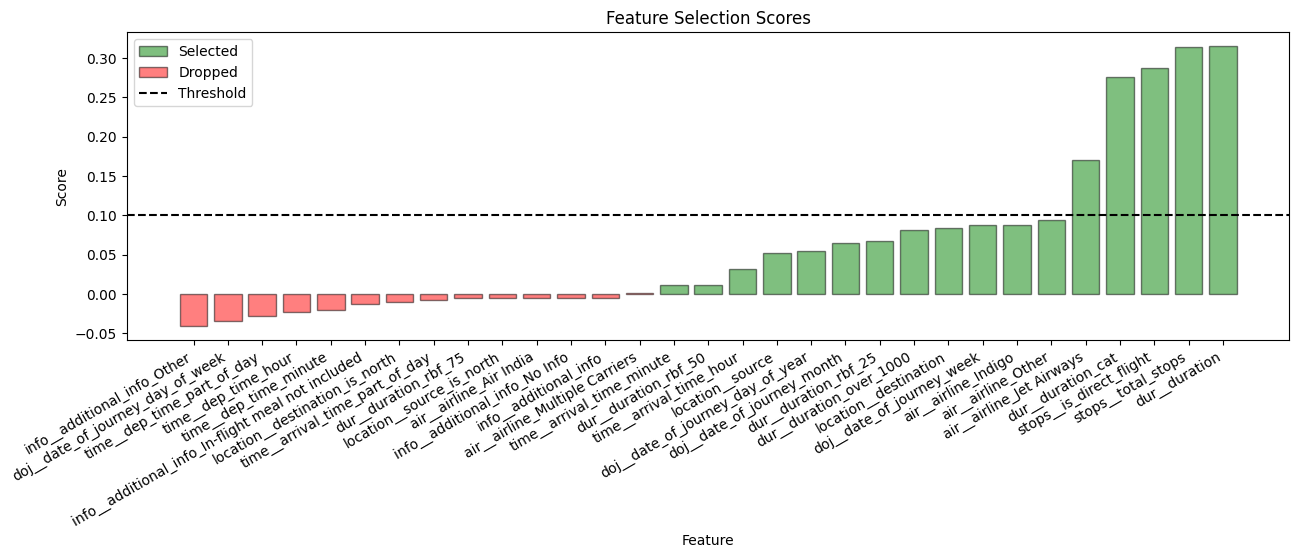

In [53]:
THRESHOLD = 0.01

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4))

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
	params = dict(
		x=i,
		height=score,
		edgecolor="black",
		alpha=0.5
	)

	if score < THRESHOLD:
		bar = ax.bar(
			color="red",
			**params
		)
		if not dropped_bar:
			dropped_bar = bar[0]
	else:
		bar = ax.bar(
			color="green",
			**params
		)
		if not selected_bar:
			selected_bar = bar[0]

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
	labels=list(sorted_feat_imp.keys()),
	rotation=30,
	ha="right"
)

ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)

ax.legend(
	handles=[selected_bar, dropped_bar, thresh_line],
	labels=["Selected", "Dropped", "Threshold"],
	loc="upper left"
)

plt.show()



*   The dataset went upto 31 columns after Feature Engineering
*   The Feature Selection algorithm selected 17 features out of that


    

